In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ابتدا، به مونت کردن محتوای گوگل درایو، به منظور دسترسی به فایل های موجود در آن برای خواندن مجموعه داده پرداختیم

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

در این قسمت کتابخانه هایی را که قصد استفاده از آن ها برای اهداف مختلف را داشتیم، ایمپورت می‌کنیم

In [ ]:
def Read(index):
  df = pd.read_csv('/content/drive/MyDrive/breast cancer.csv', index_col=index)
  return df

df = Read("id")
print(df.shape)

(569, 32)


مجموعه داده را می‌خوانیم و در یک دیتا فریم ذخیره می‌کنیم

<ipython-input-1615-ffec603f82ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


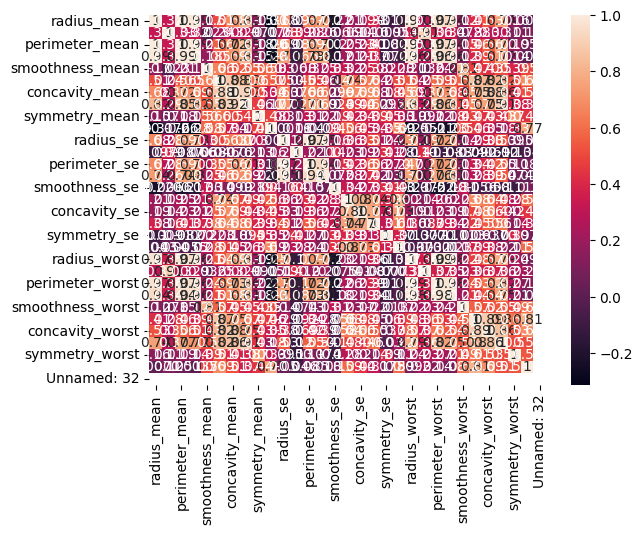

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df['diagnosis'] = df['diagnosis'].map(lambda x: int(x=="M"))

برای شناخت بهتر مجموعه داده، ماتریس همبستگی ویژگی‌ های آن را نوشتیم؛ اما به علت ابعاد بالا اطلاعات خاصی از آن نمی‌توان بدست آورد، پس از آن ستون های مجموعه داده را چاپ کردیم تا کمی بیشتر با مجموعه داده آشنا شویم
و سپس مقادیر لیبل را به مقادیر عددی ۰ و ۱ تبدیل کردیم
در اینجا مقدار

M

که نمایانگر غده سرطانی است را با مقدار یک نظیر کردیم

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
label = df['diagnosis'].copy()
df = df.drop(["Unnamed: 32", "diagnosis"], axis=1)

In [ ]:
normalized_data = df.copy()
min_max_scaler = MinMaxScaler()
normalized_data[df.columns] = min_max_scaler.fit_transform(df[df.columns])
df = normalized_data

In [ ]:
columns = df.columns
index = df.index
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns, index=index)

در اینجا پس از حذف ستون های ناخواسته و نرمال سازی ویژگی ها با کمک

MinMaxScaler

آن ها را با کمک

StandardScaler

استاندارد سازی نیز کردیم

In [ ]:
df['diagnosis'] = label

In [ ]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [ ]:
df.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
926424,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
926682,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
926954,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
927241,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1
92751,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207,0


ویژگی

diagnosis

را به عنوان ستون برچسب انتساب می‌کنیم و برای شهود بهتر نسبت به مجموعه داده پس از تغییرات انجام شده تا به اینجا، ۵ سطر اول و آخر آن را نمایش می‌دهیم

In [ ]:
model = RandomForestClassifier()
model.fit(df, df['diagnosis'])

RandomForestClassifier()

به منظور انتخاب ویژگی‌ های مفید، از مدل

Random Forest

به عنوان

Feature Extactor

استفاده می‌کنیم و در ابتدا برای انجام این کار، این مدل را بر روی مجموعه داده فیت می‌کنیم

In [ ]:
importance = model.feature_importances_

In [ ]:
feature_importances = pd.Series(importance, index=df.columns)

<Axes: >

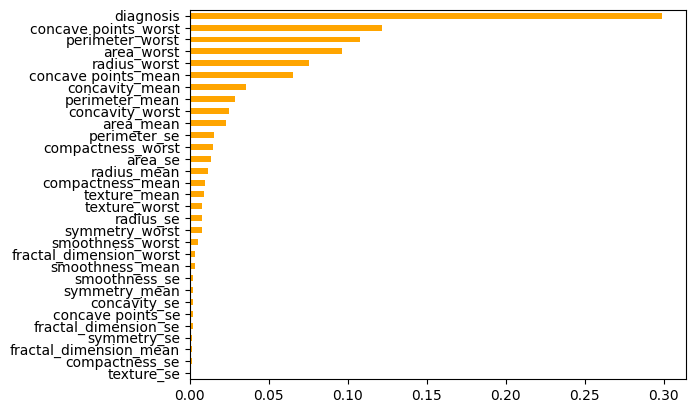

In [ ]:
feature_importances.sort_values().plot(kind='barh', color="orange")

با استفاده از پارامتر

feature_importance_

اهمیت هر ویژگی را مشخص می‌کنیم و پس از مرتب کردن ویژگی ها بر این اساس، آن ها را در یک نمودار میله ای نمایش می‌دهیم

<Axes: >

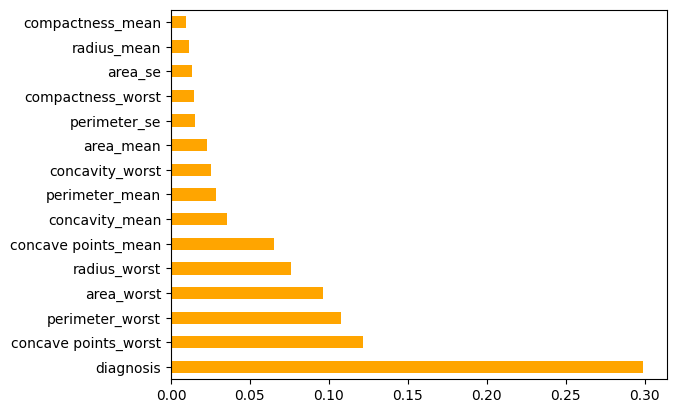

In [ ]:
features = feature_importances.sort_values(ascending=False).head(15)
features.plot(kind='barh', color="orange")

تا اینجا با آموزش یک مدل

Random Forest

و مرتب سازی ویژگی ها بر اساس پارامتر

_feature_importance

که خود مدل آن را ایجاد می‌کند، ۱۵ ویژگی اول را که به نظر مهم‌تر و تاثیرگذار تر از بقیه می آمدند، انتخاب کردیم

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['diagnosis'], axis=1), df['diagnosis'], test_size=0.2)

داده های مجموعه داده را به نسبت ۸۰ آموزشی و ۲۰ آزمایشی تقسیم می‌کنیم

In [ ]:
def draw_evaluation_charts(history):
  history_dict = history.history
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

یک تابع می‌نویسیم که مدل فیت شده را به عنوان ورودی دریافت می‌کند

و سپس نموداری برای نمایش میزان خطا به ازای تعداد دفعات رفت و برگشت

Forwarding and Backwarding passes

برای آموزش مدل شبکه عصبی

(Epoch)

 ارائه می‌دهد

در این نمودار نقاط آبی نشان دهنده

Training Loss

و خط آبی، نشان دهنده

Validation Loss

است

In [ ]:
def create_model(input_shape, learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(455, activation='sigmoid', input_shape=input_shape),
        tf.keras.layers.Dense(256, activation='sigmoid'),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

یک تابع می‌نویسیم که با دریافت ابعاد داده ها و پارامتر نرخ یادگیری، با استفاده از توابع کتابخانه

TensorFlow

برای ساخت مدل؛

هر لایه از شبکه عصبی، شامل لایه ورودی، لایه های نهان و لایه خروجی را با تابع

layers.Dense()

می‌سازد

مثلا در اینجا قصد داشتیم ۵ لایه داشته باشیم که شامل ۱ لایه ورودی، ۳ لایه نهان و ۱ لایه خروجی باشند

برای لایه ورودی، تعداد نورون ها را برابر با تعداد داده های آموزشی یعنی همان ۸۰ درصد کل مجموعه داده قرار دادیم و

input_shape = input_shape

را برای تعریف ابعاد داده های ورودی، به عنوان یک پارامتر، به این تابع دادیم

این پارامتر ورودی برای لایه اول، به

TensorFlow

کمک می‌کند ابعاد داده ها را درک کند و تعداد مناسب نورون های ورودی را در لایه اول تنظیم کند

همچنین خودمان هم به صورت دستی تعداد نورون های این لایه را برابر با تعداد داده های آموزشی یعنی ۴۵۵ قرار می‌دهیم

لازم به ذکر است از بین توابع فعال ساز ای که برای آموزش مدل امتحان کردیم، تابع فعال ساز سیگموید بالاترین دقت را داشت

در توضیح علت استفاده از این تابع در مدل پرسپترون چند لایه باید بگوییم

این تابع، اعداد عضو مجموعه اعداد حقیقی را به مقادیر بین ۰ و ۱ منتقل می‌کند؛ به طوری که مقادیر مثبت، احتمالی بزرگتر از ۰/۵ و مقادیر منفی، احتمالی کمتر از ۰/۵ خواهند داشت

به منظور آموزش دقیق تر مدل، برای لایه های نهان به ترتیب ۲۵۶، ۱۲۸ و ۶۴ نورون در نظر گرفتیم که این مقادیر توان هایی از عدد ۲ هستند

در نهایت یک نورون هم برای لایه خروجی خواهیم داشت که با توجه با تابع فعال ساز سیگموید، مقداری بین ۰ و ۱ خواهد بود

در ادامه پارامتر نرخ یادگیری را به تابع بهینه ساز می‌دهیم و فرایند ساخت مدل را با تابع کامپایل تکمیل می‌کنیم

در این تابع، به عنوان تابع زیان، از

Binary Cross Entropy

استفاده کردیم؛ این تابع زیان، بیشتر در شبکه های با تابع فعالسازی سیگموید کاربرد دارد
و مشتق پذیر بودن از مزایای آن است

همچنین یکی از معیار های سنجش مدل را نیز، دقت گذاشتیم

In [ ]:
input_shape = (X_train.shape[1],)
learning_rate = 0.01
model = create_model(input_shape, learning_rate)
history = model.fit(X_train, y_train, epochs=40, batch_size=455, validation_split=0.2)
loss_train, accuracy_train = model.evaluate(X_train, y_train)
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'Train loss: {loss_train}')
print(f'Test loss: {loss_test}')
print(f'Train accuracy: {accuracy_train}')
print(f'Test accuracy: {accuracy_test}')

Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: 0.7046 - accuracy: 0.3681 - val_loss: 1.1944 - val_accuracy: 0.6154
Epoch 2/40
1/1 [==============================] - 0s 71ms/step - loss: 1.1453 - accuracy: 0.6319 - val_loss: 0.9222 - val_accuracy: 0.6154
Epoch 3/40
1/1 [==============================] - 0s 55ms/step - loss: 0.8876 - accuracy: 0.6319 - val_loss: 0.6845 - val_accuracy: 0.6154
Epoch 4/40
1/1 [==============================] - 0s 57ms/step - loss: 0.6699 - accuracy: 0.6319 - val_loss: 0.6969 - val_accuracy: 0.3846
Epoch 5/40
1/1 [==============================] - 0s 59ms/step - loss: 0.6977 - accuracy: 0.3681 - val_loss: 0.7525 - val_accuracy: 0.3846
Epoch 6/40
1/1 [==============================] - 0s 84ms/step - loss: 0.7590 - accuracy: 0.3681 - val_loss: 0.7326 - val_accuracy: 0.3846
Epoch 7/40
1/1 [==============================] - 0s 74ms/step - loss: 0.7377 - accuracy: 0.3681 - val_loss: 0.6872 - val_accuracy: 0.9670
Epoch 8/40
1/1 [=============

حال برای ساخت ۴ تا مدل خواسته شده

از پارامتر های نرخ یادگیری ۰/۰۱ و ۰/۰۰۱

و تعداد دفعات رفت و برگشت برای آموزش

(Epoch)

با مقادیر ۲۰ و ۴۰ استفاده کردیم

همچنین در فرایند فیت کردن همه مدل ها، مقدار

batch_size

را که همان تعداد داده ها است، برابر تعداد داده های آموزشی یعنی ۴۵۵ قرار دادیم
و مقدار

validation_split

را نیز به منظور جلوگیری از بیش برازش برابر ۰/۲ در نظر گرفتیم

در اولین مدل با مقادیر پارامتر نرخ یادگیری برابر با ۰/۰۱ و اپوک برابر با ۴۰

دقت پیش بینی مدل بر روی داده های آزمایشی پس از ارزیابی مدل، حدودا برابر با ۹۷ درصد بدست آمد که مقدار بسیار خوبی است
همچنین مقدار تابع زیان پیش بینی مدل بر روی مجموعه داده آزمایشی نیز حدودا برابر ۰/۱۳ محاسبه شد

علاوه بر این دقت پیش بینی مدل بر روی داده های آموزشی پس از ارزیابی مدل، حدودا برابر با ۹۹ درصد بدست آمد


همچنین مقدار تابع زیان پیش بینی مدل بر روی مجموعه داده آموزشی نیز حدودا برابر ۰/۰۴ محاسبه شد

در انتها نیز به این نتیجه می‌رسیم که دقت این مدل از بقیه مدل ها بالاتر شده است

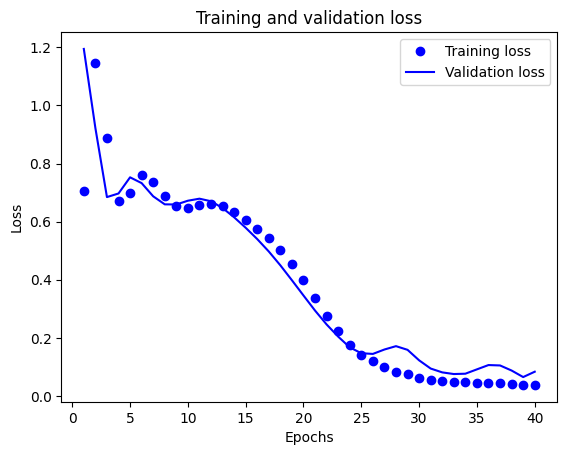

In [ ]:
draw_evaluation_charts(history)

In [ ]:
input_shape = (X_train.shape[1],)
learning_rate = 0.01
model = create_model(input_shape, learning_rate)
history = model.fit(X_train, y_train, epochs=20, batch_size=455, validation_split=0.2)
loss_train, accuracy_train = model.evaluate(X_train, y_train)
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'Train loss: {loss_train}')
print(f'Test loss: {loss_test}')
print(f'Train accuracy: {accuracy_train}')
print(f'Test accuracy: {accuracy_test}')

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6667 - accuracy: 0.6319 - val_loss: 1.3272 - val_accuracy: 0.3846
Epoch 2/20
1/1 [==============================] - 0s 74ms/step - loss: 1.3595 - accuracy: 0.3681 - val_loss: 0.7806 - val_accuracy: 0.3846
Epoch 3/20
1/1 [==============================] - 0s 55ms/step - loss: 0.7909 - accuracy: 0.3681 - val_loss: 0.6820 - val_accuracy: 0.6154
Epoch 4/20
1/1 [==============================] - 0s 57ms/step - loss: 0.6668 - accuracy: 0.6319 - val_loss: 0.8009 - val_accuracy: 0.6154
Epoch 5/20
1/1 [==============================] - 0s 74ms/step - loss: 0.7740 - accuracy: 0.6319 - val_loss: 0.8009 - val_accuracy: 0.6154
Epoch 6/20
1/1 [==============================] - 0s 53ms/step - loss: 0.7738 - accuracy: 0.6319 - val_loss: 0.7470 - val_accuracy: 0.6154
Epoch 7/20
1/1 [==============================] - 0s 54ms/step - loss: 0.7244 - accuracy: 0.6319 - val_loss: 0.6993 - val_accuracy: 0.6154
Epoch 8/20
1/1 [=============

در دومین مدل با مقادیر پارامتر نرخ یادگیری برابر با ۰/۰۱ و اپوک برابر با ۲۰

دقت پیش بینی مدل بر روی داده های آزمایشی پس از ارزیابی مدل، حدودا برابر با ۹۵ درصد بدست آمد که مقدار بسیار خوبی است
همچنین مقدار تابع زیان پیش بینی مدل بر روی مجموعه داده آزمایشی نیز حدودا برابر با ۰/۲۴ شد

علاوه بر این دقت پیش بینی مدل بر روی داده های آموزشی پس از ارزیابی مدل، حدودا برابر با ۹۵ درصد بدست آمد

همچنین مقدار تابع زیان پیش بینی مدل بر روی مجموعه داده آموزشی نیز حدودا برابر ۰/۲ محاسبه شد

از مقایسه مدل های اول و دوم می‌توان نتیجه گرفت که با افزایش تعداد اپوک که همان تعداد رفت و برگشت ها در آموزش مدل شبکه عصبی است، مقدار دقت به میزان اندکی بهتر شده و مقدار تابع زیان نیز کمی کاهش یافته است

البته در اینجا چون میزان دقت و تابع زیان به ترتیب نزدیک به بیشینه و کمینه مقدار ممکن بودند، این تفاوت کم حاصل شده است

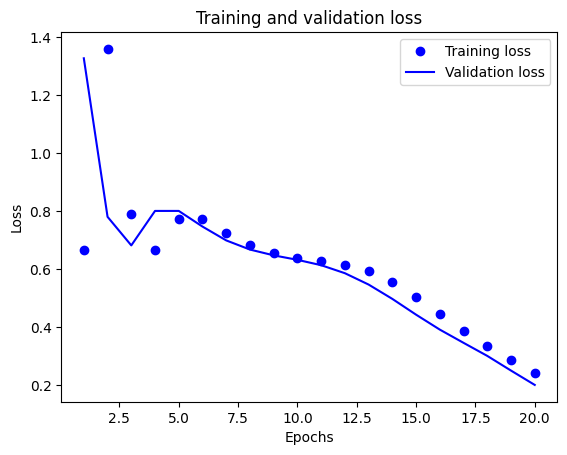

In [ ]:
draw_evaluation_charts(history)

In [ ]:
input_shape = (X_train.shape[1],)
learning_rate = 0.001
model = create_model(input_shape, learning_rate)
history = model.fit(X_train, y_train, epochs=40, batch_size=455, validation_split=0.2)
loss_train, accuracy_train = model.evaluate(X_train, y_train)
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'Train loss: {loss_train}')
print(f'Test loss: {loss_test}')
print(f'Train accuracy: {accuracy_train}')
print(f'Test accuracy: {accuracy_test}')

Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: 0.6575 - accuracy: 0.6319 - val_loss: 0.6689 - val_accuracy: 0.6154
Epoch 2/40
1/1 [==============================] - 0s 54ms/step - loss: 0.6575 - accuracy: 0.6319 - val_loss: 0.6624 - val_accuracy: 0.6154
Epoch 3/40
1/1 [==============================] - 0s 56ms/step - loss: 0.6526 - accuracy: 0.6319 - val_loss: 0.6569 - val_accuracy: 0.6154
Epoch 4/40
1/1 [==============================] - 0s 70ms/step - loss: 0.6493 - accuracy: 0.6319 - val_loss: 0.6533 - val_accuracy: 0.6154
Epoch 5/40
1/1 [==============================] - 0s 56ms/step - loss: 0.6471 - accuracy: 0.6319 - val_loss: 0.6489 - val_accuracy: 0.6154
Epoch 6/40
1/1 [==============================] - 0s 69ms/step - loss: 0.6427 - accuracy: 0.6319 - val_loss: 0.6438 - val_accuracy: 0.6154
Epoch 7/40
1/1 [==============================] - 0s 73ms/step - loss: 0.6370 - accuracy: 0.6319 - val_loss: 0.6385 - val_accuracy: 0.6154
Epoch 8/40
1/1 [=============

در سومین مدل با مقادیر پارامتر نرخ یادگیری برابر با ۰/۰۰۱ و اپوک برابر با ۴۰

دقت پیش بینی مدل بر روی داده های آزمایشی پس از ارزیابی مدل، حدودا برابر با ۹۶ درصد بدست آمد که مقدار بسیار خوبی است
همچنین مقدار تابع زیان پیش بینی مدل بر روی مجموعه داده آزمایشی نیز حدودا برابر با ۰/۱۲ شد

علاوه بر این دقت پیش بینی مدل بر روی داده های آموزشی پس از ارزیابی مدل، حدودا برابر با ۹۷ درصد بدست آمد

همچنین مقدار تابع زیان پیش بینی مدل بر روی مجموعه داده آموزشی نیز حدودا برابر ۰/۰۸ محاسبه شد


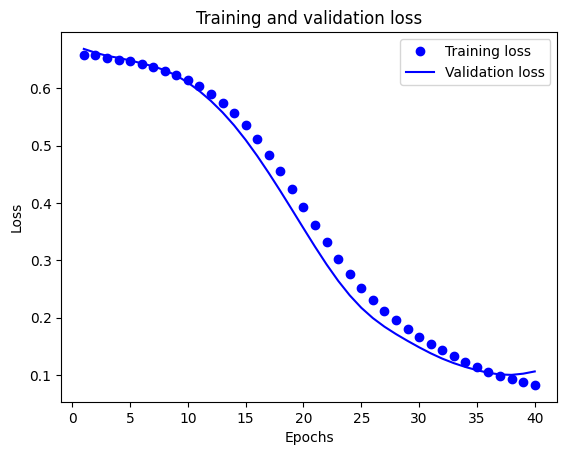

In [ ]:
draw_evaluation_charts(history)

In [ ]:
input_shape = (X_train.shape[1],)
learning_rate = 0.001
model = create_model(input_shape, learning_rate)
history = model.fit(X_train, y_train, epochs=20, batch_size=455, validation_split=0.2)
loss_train, accuracy_train = model.evaluate(X_train, y_train)
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'Train loss: {loss_train}')
print(f'Test loss: {loss_test}')
print(f'Train accuracy: {accuracy_train}')
print(f'Test accuracy: {accuracy_test}')

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.8591 - accuracy: 0.3681 - val_loss: 0.7590 - val_accuracy: 0.3846
Epoch 2/20
1/1 [==============================] - 0s 54ms/step - loss: 0.7657 - accuracy: 0.3681 - val_loss: 0.7006 - val_accuracy: 0.3846
Epoch 3/20
1/1 [==============================] - 0s 54ms/step - loss: 0.7020 - accuracy: 0.3681 - val_loss: 0.6706 - val_accuracy: 0.6154
Epoch 4/20
1/1 [==============================] - 0s 72ms/step - loss: 0.6670 - accuracy: 0.6319 - val_loss: 0.6630 - val_accuracy: 0.6154
Epoch 5/20
1/1 [==============================] - 0s 72ms/step - loss: 0.6550 - accuracy: 0.6319 - val_loss: 0.6692 - val_accuracy: 0.6154
Epoch 6/20
1/1 [==============================] - 0s 53ms/step - loss: 0.6576 - accuracy: 0.6319 - val_loss: 0.6805 - val_accuracy: 0.6154
Epoch 7/20
1/1 [==============================] - 0s 54ms/step - loss: 0.6663 - accuracy: 0.6319 - val_loss: 0.6907 - val_accuracy: 0.6154
Epoch 8/20
1/1 [=============

در چهارمین مدل با مقادیر پارامتر نرخ یادگیری برابر با ۰/۰۰۱ و اپوک برابر با ۲۰

دقت پیش بینی مدل بر روی داده های آزمایشی پس از ارزیابی مدل، حدودا برابر با ۶۲ درصد بدست آمد
همچنین مقدار تابع زیان پیش بینی مدل بر روی داده آزمایشی نیز حدودا برابر با ۰/۶۴ شد

علاوه بر این دقت پیش بینی مدل بر روی داده های آموزشی پس از ارزیابی مدل، حدودا برابر با ۶۳ درصد بدست آمد


همچنین مقدار تابع زیان پیش بینی مدل بر روی مجموعه داده آموزشی نیز حدودا برابر ۰/۶۴ محاسبه شد


از مقایسه مدل های سوم و چهارم می‌توان نتیجه گرفت که با افزایش تعداد اپوک که همان تعداد رفت و برگشت ها در آموزش مدل شبکه عصبی است، مقدار دقت به میزان قابل توجهی بهتر شده و مقدار تابع زیان نیز کاهش یافته است

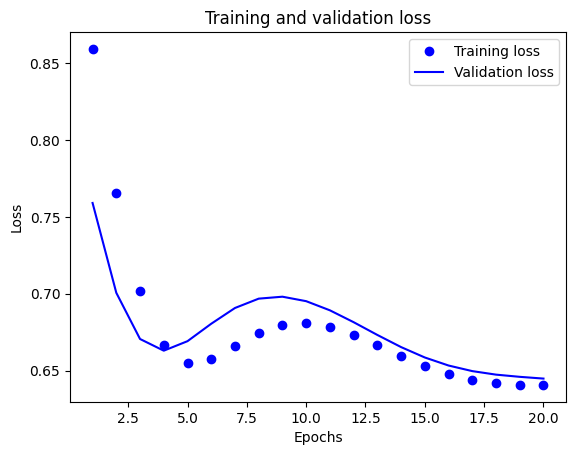

In [ ]:
draw_evaluation_charts(history)

In [ ]:
# Best Model
input_shape = (X_train.shape[1],)
learning_rate = 0.01
model = create_model(input_shape, learning_rate)
history = model.fit(X_train, y_train, epochs=40, batch_size=455, validation_split=0.2)
loss_train, accuracy_train = model.evaluate(X_train, y_train)
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'Train loss: {loss_train}')
print(f'Test loss: {loss_test}')
print(f'Train accuracy: {accuracy_train}')
print(f'Test accuracy: {accuracy_test}')

Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: 0.6581 - accuracy: 0.6319 - val_loss: 0.8155 - val_accuracy: 0.3846
Epoch 2/40
1/1 [==============================] - 0s 135ms/step - loss: 0.8327 - accuracy: 0.3681 - val_loss: 0.8218 - val_accuracy: 0.6154
Epoch 3/40
1/1 [==============================] - 0s 77ms/step - loss: 0.7937 - accuracy: 0.6319 - val_loss: 0.8334 - val_accuracy: 0.6154
Epoch 4/40
1/1 [==============================] - 0s 95ms/step - loss: 0.8044 - accuracy: 0.6319 - val_loss: 0.7160 - val_accuracy: 0.6154
Epoch 5/40
1/1 [==============================] - 0s 96ms/step - loss: 0.6956 - accuracy: 0.6319 - val_loss: 0.6397 - val_accuracy: 0.6154
Epoch 6/40
1/1 [==============================] - 0s 104ms/step - loss: 0.6298 - accuracy: 0.6319 - val_loss: 0.6407 - val_accuracy: 0.6593
Epoch 7/40
1/1 [==============================] - 0s 115ms/step - loss: 0.6397 - accuracy: 0.6923 - val_loss: 0.6591 - val_accuracy: 0.7143
Epoch 8/40
1/1 [==========

همانطور که گفته شد، اولین مدل را به عنوان بهترین مدل در نظر می‌گیریم

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


با استفاده از این مدل، به پیش بینی داده های آزمایشی می‌پردازیم

In [ ]:
y_pred = [1 if x > 0.5 else 0 for x in y_pred]
print(y_pred)

[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]


مقادیر پیش بینی شده، اعدادی بین ۰ و ۱ هستند؛ در نتیجه دقیقا مشابه کاری که تابع ارزیابی پیش از سنجش دقت مدل انجام می‌داد، مقادیر پیش بینی شده ای که بزرگتر از ۱/۲ هستند را به ۱ و مقادیر کمتر از ۱/۲ را به ۰، نگاشت می‌کنیم

In [ ]:
cm = confusion_matrix(y_test, y_pred)

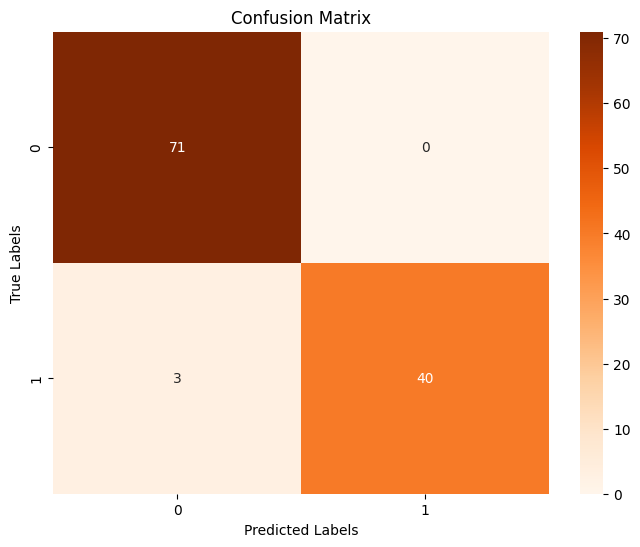

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

در نهایت ماتریس آشفتگی این مدل را محاسبه می‌کنیم

مشاهده می‌شود که ۴۰ داده برچسب ۱ داشته اند و بدرستی ۱ پیش بینی شده اند

همچنین ۷۱ داده نیز برچسب ۰ داشته اند و بدرستی ۰ پیش بینی شده اند

همچنین تنها ۳ داده بوده است که برچسب ۱ داشته ولی به اشتباه ۰ پیش بینی شده است

 و هیچ داده ای نبوده که در واقعیت برچسب ۰ داشته باشد، ولی به اشتباه ۱ پیش بینی شده باشد

In [ ]:
print(classification_report(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precison: ', precision)
print('Recall: ', recall)
print('F1 score: ', f1)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Precison:  1.0
Recall:  0.9302325581395349
F1 score:  0.963855421686747


معیار های صحت، پوشش و امتیاز اف یک را نیز محاسبه می‌کنیم

دقت مدل حدود ۹۷ درصد محاسبه شده بود یعنی ۹۷ درصد پیش بینی ها درست بوده اند

همچنین از مقدار محاسبه شده برای صحت می‌توان نتیجه گرفت
 ۱۰۰ درصد از کل داده هایی
که الگوریتم به آنها برچسب ۱ داده است، به درستی تشخیص داده شده اند و در  
واقعیت برچسب ۱ داشته اند

مقدار فراخوانی نیز حدود ۹۳ درصد بدست آمد به این معنا که حدود ۹۳ درصد
از کل داده های با برچسب ۱ به درستی تشخیص داده شده اند

مقدار امتیاز اف یک نیز حدود ۹۶ درصد محاسبه شد

همچنین در قسمت بالاتر در صورتی که به جای ۱، ۰ را معیار اصلی برای سنجش صحت و سایر سنجه ها قرار دهیم، نتایج گزارش داده شده است

و همه معیار های سنجش با استفاده از روش های میانگین ماکرو و وزن دار محاسبه شده اند

در انتها لازم به ذکر است به علت اینکه توابع آموزش دهنده شبکه های عصبی در هر بار اجرا ممکن است مدلی با کمی تفاوت نسبت به اجرای قبلی آموزش دهند؛ توضیحات فعلی نسبت به آخرین اجرا نوشته شده و ممکن است با اجرای دوباره برنامه، نتایج متفاوتی بدست آیند

همچنین شایان ذکر است که در یکی از دفعات اجرا، بالاترین دقت مدل بر روی داده های آزمایشی به بیش از ۹۹ درصد رسید، به گونه ای که تنها یک داده که برچسب ۱ داشت، به اشتباه ۰ پیش بینی شده بود